<a href="https://colab.research.google.com/github/MarileideSoaresSilva/Leide/blob/main/Checkoutmod2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
!pip install google-colab
from google.colab import files




#Uploaded file

In [93]:
uploaded = files.upload()
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['abalone.csv']))
print(df.head())

Saving abalone.csv to abalone.csv
  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


#=> Número de variáveis encontradas: 9;
#=> Número de Instâncias: As fontes fornecem apenas trechos dos dados, impossibilitando determinar o número total de instâncias.
#=> Valores Ausentes: Não foram identificados valores ausentes nos trechos de dados fornecidos;
#Quanto ao tipo de variáveis, encontrou-se variávei categóricas (sexo), numéricas contínua (comprimento, diâmetro, altura, peso total, peso da carne, peso das vísceras, peso da concha), numérica discreta (anéis).

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

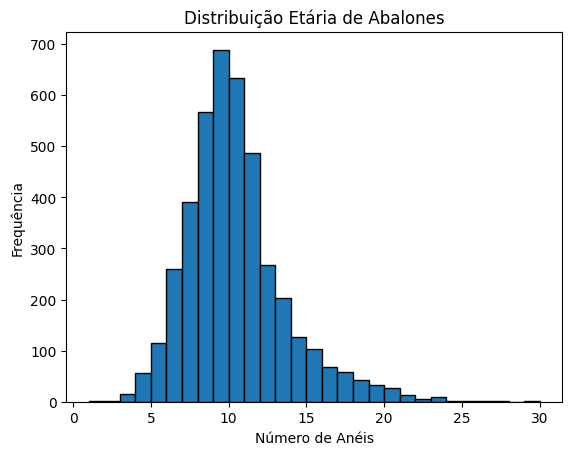

In [96]:
plt.hist(df['Rings'], bins=range(min(df['Rings']), max(df['Rings']) + 2, 1), edgecolor='black') # bins ajusta as barras
plt.xlabel('Número de Anéis')
plt.ylabel('Frequência')
plt.title('Distribuição Etária de Abalones')
plt.show()

#Este código gerou um histograma mostrando a frequência de abalones para cada número de anéis, permitindo analisar a distribuição etária da população.

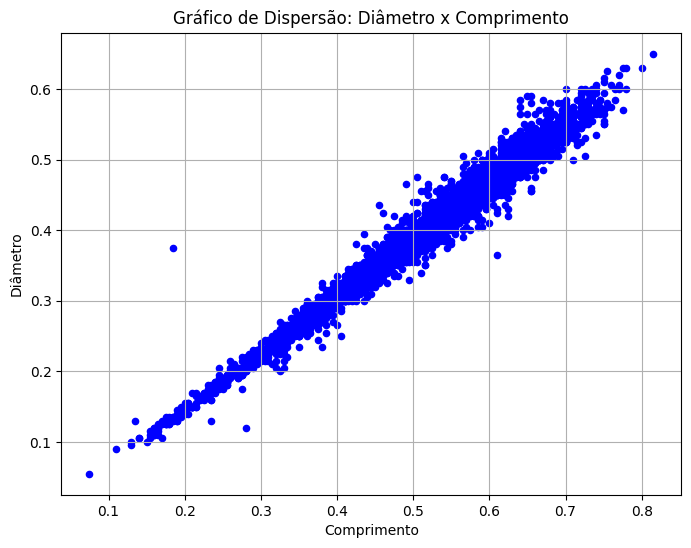

In [97]:
plt.figure(figsize=(8, 6)) # Define o tamanho da figura (opcional)
plt.scatter(df['Length'], df['Diameter'], marker='o', s=20, c='blue') # cria o gráfico de dispersão
plt.xlabel('Comprimento')
plt.ylabel('Diâmetro')
plt.title('Gráfico de Dispersão: Diâmetro x Comprimento')
plt.grid(True) # Adiciona uma grade (opcional)
plt.show()

Este gráfico de dispersão de Comprimento x Diâmetro revela que abalones maiores tendem a ter diâmetros maiores, indicando uma possível correlação positiva entre essas variáveis

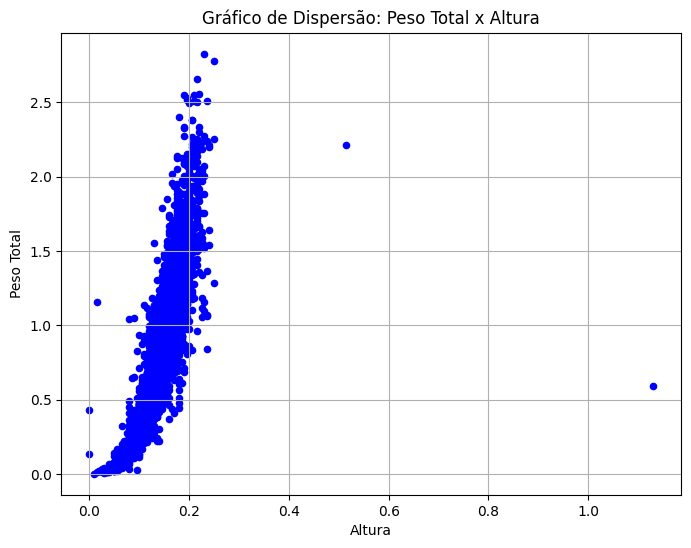

In [98]:
plt.figure(figsize=(8, 6)) # Define o tamanho da figura (opcional)
plt.scatter(df['Height'], df['Whole weight'], marker='o', s=20, c='blue') # cria o gráfico de dispersão
plt.xlabel('Altura')
plt.ylabel('Peso Total')
plt.title('Gráfico de Dispersão: Peso Total x Altura')
plt.grid(True) # Adiciona uma grade (opcional)
plt.show()

Este gráfico de dispersão de Peso Total x Altura mostra uma correlação positiva entre essas variáveis, revelando que os abalones tendem a ter uma altura máxima entre 0.2 e 0.3.

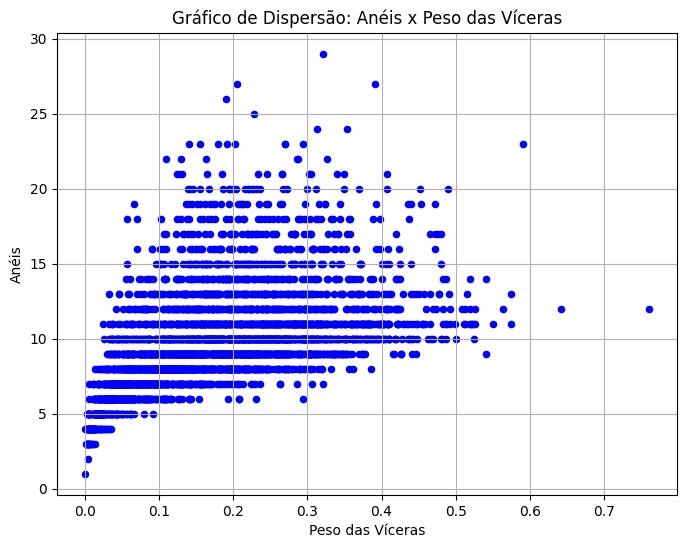

In [100]:
plt.figure(figsize=(8, 6)) # Define o tamanho da figura (opcional)
plt.scatter(df['Viscera weight'], df['Rings'], marker='o', s=20, c='blue') # cria o gráfico de dispersão
plt.xlabel('Peso das Víceras')
plt.ylabel('Anéis')
plt.title('Gráfico de Dispersão: Anéis x Peso das Víceras')
plt.grid(True) # Adiciona uma grade (opcional)
plt.show()

Este gráfico de dispersão de Anéis x Pesos das Víceras mostra a correlação positiva entre essas variáveis... Este gráfico de dispersão auxiliará na identificação de padrões e tendências entre essas variáveis, além de auxiliar na formulação de hipóteses sobre as relações entre elas.

In [101]:
!pip install seaborn #Instalando o Seaborn para criar um boxplot.

In [102]:
import seaborn as sns

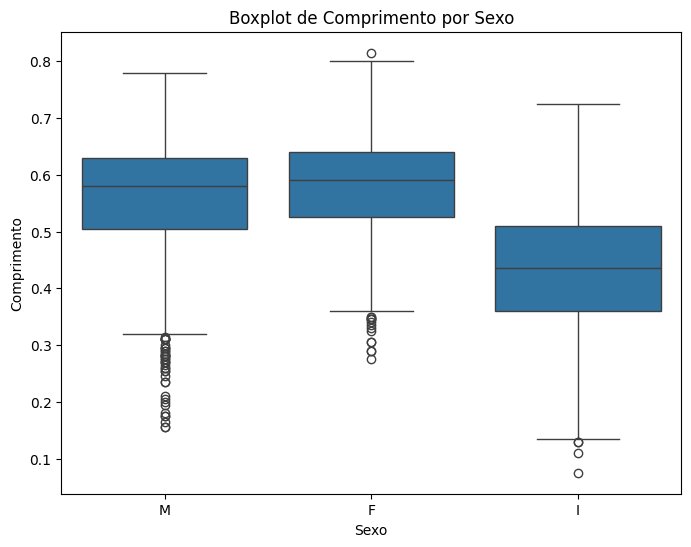

In [103]:
plt.figure(figsize=(8, 6)) # Define o tamanho da figura (opcional)
sns.boxplot(x='Sex', y='Length', data=df) # cria o boxplot
plt.xlabel('Sexo')
plt.ylabel('Comprimento')
plt.title('Boxplot de Comprimento por Sexo')
plt.show()

Este código gera um boxplot mostrando a distribuição do "Comprimento" para cada sexo (M, F, I). Cada boxplot mostra a mediana, os quartis (Q1 e Q3), e os outliers. Isso permite uma comparação visual da distribuição do comprimento entre os diferentes sexos de abalones.

In [104]:
!pip install scikit-learn #dividir um conjunto de dados em conjuntos de treinamento e teste.

#Vamos utilizar a função train_test_split da biblioteca scikit-learn (sklearn).

In [105]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

#Dividindo os Dados em Conjuntos de Treinamento e Teste

In [106]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Sex_num'],
      dtype='object')

In [107]:
X = df[df.columns[1:-1]] #Dataframe de atributos básicos;
y = df['Rings'] #Dataframe de atributos alvos;

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# => Test_size=0.3 define a proporção de 30% para o conjunto de teste.
# => Random_state=42 define uma semente para o gerador de números aleatórios, garantindo a reprodutibilidade da divisão.

In [109]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2923, 8)
X_test shape: (1254, 8)
y_train shape: (2923,)
y_test shape: (1254,)


# Treinando e avaliando um modelo de regressão linear para predizer a idade do Abalone:

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler # para escalonamento dos dados (opcional)

# Criando e treinamento do modelo:

In [111]:
modelo = LinearRegression()


#Dividindo os dados em treino e teste

In [113]:
[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size=0.3)
X_train


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4065,0.370,0.275,0.080,0.2325,0.0930,0.0560,0.0720,6
1388,0.630,0.495,0.160,1.0930,0.4970,0.2210,0.3150,12
1381,0.625,0.505,0.175,1.1500,0.5475,0.2560,0.3045,11
3354,0.455,0.360,0.110,0.4385,0.2060,0.0980,0.1250,10
1942,0.630,0.490,0.155,1.2525,0.6300,0.2460,0.2890,9
...,...,...,...,...,...,...,...,...
3332,0.440,0.340,0.125,0.4895,0.1735,0.0875,0.2000,13
3026,0.495,0.375,0.115,0.5070,0.2410,0.1030,0.1500,8
1881,0.550,0.450,0.130,0.8040,0.3375,0.1405,0.2300,6
2875,0.435,0.335,0.095,0.2980,0.1090,0.0580,0.1150,7


In [114]:
X_test

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2436,0.515,0.400,0.160,0.8175,0.2515,0.1560,0.3000,23
3541,0.450,0.350,0.110,0.5140,0.2530,0.1045,0.1400,8
2075,0.595,0.465,0.150,0.9190,0.4335,0.1765,0.2620,9
640,0.325,0.240,0.085,0.1730,0.0795,0.0380,0.0500,7
2350,0.515,0.435,0.170,0.6310,0.2765,0.1110,0.2160,12
...,...,...,...,...,...,...,...,...
3045,0.580,0.435,0.155,0.8785,0.4250,0.1685,0.2425,10
954,0.490,0.385,0.125,0.6490,0.3200,0.1240,0.1695,8
3359,0.580,0.445,0.170,1.1780,0.3935,0.2165,0.3150,20
1218,0.315,0.230,0.070,0.1145,0.0460,0.0235,0.0385,5


In [115]:

y_train

,Rings
4065,6
1388,12
1381,11
3354,10
1942,9
...,...
3332,13
3026,8
1881,6
2875,7


In [116]:
model.fit(X_train, y_train)

LinearRegression()

In [117]:
y_test

,Rings
2436,23
3541,8
2075,9
640,7
2350,12
...,...
3045,10
954,8
3359,20
1218,5


# Treinando o modelo com os dados de treinamento

In [119]:
model.fit(X_train, y_train)

LinearRegression()

# Fazendo predições com os dados de teste

In [120]:
y_pred = model.predict(X_test)
y_pred

array([23.,  8.,  9., ..., 20.,  5., 10.])

# Calculando o R²

In [121]:
r2 = r2_score(y_test, y_pred)
r2

1.0